In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from preprocessing import read_csv_files, filter_nodes, convert_dates_to_datetime,add_holidays
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = './data'
filenames = ['champs-elysees.csv', 'convention.csv', 'saints-peres.csv']
dfs = read_csv_files(DATA_DIR, filenames)

In [3]:
TIME_WINDOW = 14

In [4]:
df = pd.concat(dfs)
df.head()

,Libelle,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape,filename
Date et heure de comptage,,,,,,,,,,,,,,
2021-11-01T04:00:00+01:00,AV_Champs_Elysees,1222.0,42.87945,Saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062","{""coordinates"": [[2.3009951475, 48.8717770435]...",champs-elysees.csv
2021-11-01T05:00:00+01:00,AV_Champs_Elysees,1033.0,44.35278,Saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062","{""coordinates"": [[2.3009951475, 48.8717770435]...",champs-elysees.csv
2021-11-01T06:00:00+01:00,AV_Champs_Elysees,824.0,20.16222,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062","{""coordinates"": [[2.3009951475, 48.8717770435]...",champs-elysees.csv
2021-11-01T07:00:00+01:00,AV_Champs_Elysees,710.0,12.20000,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062","{""coordinates"": [[2.3009951475, 48.8717770435]...",champs-elysees.csv
2021-11-01T08:00:00+01:00,AV_Champs_Elysees,947.0,40.57222,Saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062","{""coordinates"": [[2.3009951475, 48.8717770435]...",champs-elysees.csv


In [5]:
df.isna().sum()

Libelle                    0
Débit horaire              0
Taux d'occupation          0
Etat trafic                0
Identifiant noeud amont    0
Libelle noeud amont        0
Identifiant noeud aval     0
Libelle noeud aval         0
Etat arc                   0
Date debut dispo data      0
Date fin dispo data        0
geo_point_2d               0
geo_shape                  0
filename                   0
dtype: int64

In [6]:
df_filtered = filter_nodes(df)

In [7]:
df_filtered.shape

(27404, 14)

In [8]:
df_filtered = df_filtered.drop(['Libelle noeud amont','Libelle noeud aval'],axis=1)

In [9]:
df_filtered.shape

(27404, 12)

In [10]:
df_filtered = convert_dates_to_datetime(df_filtered,'Date et heure de comptage')
print(df_filtered['Date et heure de comptage'])

Date et heure de comptage
2021-11-01T04:00:00+01:00   2021-11-01 04:00:00
2021-11-01T05:00:00+01:00   2021-11-01 05:00:00
2021-11-01T06:00:00+01:00   2021-11-01 06:00:00
2021-11-01T07:00:00+01:00   2021-11-01 07:00:00
2021-11-01T08:00:00+01:00   2021-11-01 08:00:00
                                    ...        
2022-12-01T20:00:00+01:00   2022-12-01 20:00:00
2022-12-01T21:00:00+01:00   2022-12-01 21:00:00
2022-12-01T22:00:00+01:00   2022-12-01 22:00:00
2022-12-01T23:00:00+01:00   2022-12-01 23:00:00
2022-12-02T00:00:00+01:00   2022-12-02 00:00:00
Name: Date et heure de comptage, Length: 27404, dtype: datetime64[ns]


<AxesSubplot: xlabel='Date et heure de comptage'>

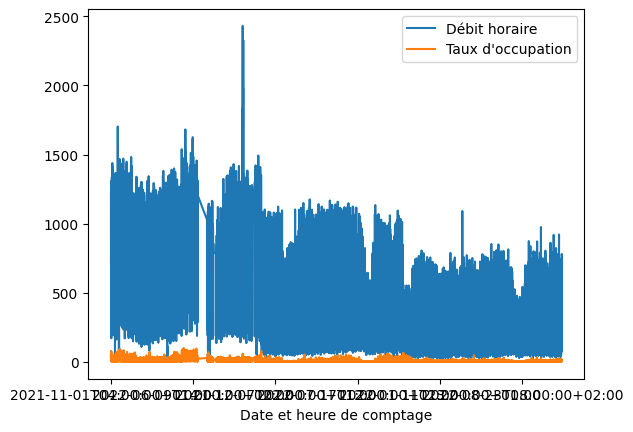

In [11]:

df_filtered[['Débit horaire', "Taux d'occupation"]].plot()

<AxesSubplot: >

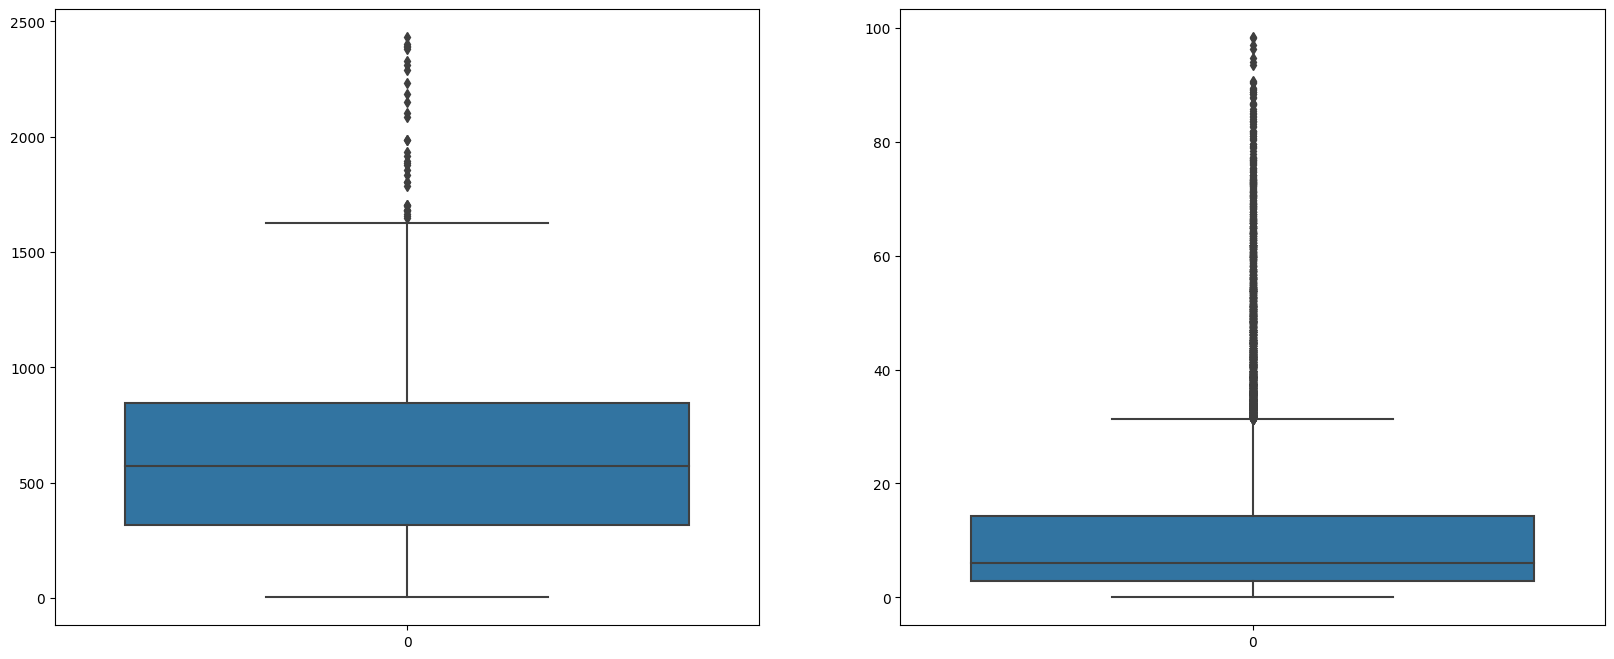

In [12]:
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
sns.boxplot(df_filtered['Débit horaire'])

plt.subplot(1, 2, 2)
sns.boxplot(df_filtered["Taux d'occupation"])

In [13]:
df_filtered['Jour de la semaine'] = pd.to_datetime(df_filtered["Date et heure de comptage"]).dt.dayofweek
df_filtered = pd.concat([
    df_filtered,
    pd.get_dummies(df_filtered['Jour de la semaine'],prefix='Jour de la semaine')
], axis=1).drop(columns=['Jour de la semaine'])

df_filtered.sample(10)

,Libelle,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Identifiant noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape,filename,Date et heure de comptage,Jour de la semaine_0,Jour de la semaine_1,Jour de la semaine_2,Jour de la semaine_3,Jour de la semaine_4,Jour de la semaine_5,Jour de la semaine_6
Date et heure de comptage,,,,,,,,,,,,,,,,,,,,
2022-01-06T23:00:00+01:00,Convention,341.0,1.99000,Fluide,2937,2973,Invalide,2005-01-01,2019-06-01,"48.838634372743535,2.2932056027175345","{""coordinates"": [[2.2918783063, 48.8392381071]...",convention.csv,2022-01-06 23:00:00,0,0,0,1,0,0,0
2021-12-15T14:00:00+01:00,Sts_Peres,681.0,11.65333,Fluide,114,119,Invalide,2005-01-01,2019-06-01,"48.85728037123275,2.3324541907176717","{""coordinates"": [[2.3332577811, 48.858260067],...",saints-peres.csv,2021-12-15 14:00:00,0,0,1,0,0,0,0
2022-04-13T12:00:00+02:00,Sts_Peres,630.0,10.48889,Fluide,114,119,Invalide,2005-01-01,2019-06-01,"48.85728037123275,2.3324541907176717","{""coordinates"": [[2.3332577811, 48.858260067],...",saints-peres.csv,2022-04-13 11:00:00,0,0,1,0,0,0,0
2021-11-26T00:00:00+01:00,Sts_Peres,559.0,6.29333,Fluide,114,119,Invalide,2005-01-01,2019-06-01,"48.85728037123275,2.3324541907176717","{""coordinates"": [[2.3332577811, 48.858260067],...",saints-peres.csv,2021-11-26 00:00:00,0,0,0,0,1,0,0
2022-04-30T08:00:00+02:00,Sts_Peres,176.0,2.14445,Fluide,114,119,Invalide,2005-01-01,2019-06-01,"48.85728037123275,2.3324541907176717","{""coordinates"": [[2.3332577811, 48.858260067],...",saints-peres.csv,2022-04-30 07:00:00,0,0,0,0,0,1,0
2022-03-04T01:00:00+01:00,Convention,315.0,1.70556,Fluide,2937,2973,Invalide,2005-01-01,2019-06-01,"48.838634372743535,2.2932056027175345","{""coordinates"": [[2.2918783063, 48.8392381071]...",convention.csv,2022-03-04 01:00:00,0,0,0,0,1,0,0
2022-02-17T01:00:00+01:00,Convention,293.0,1.83167,Fluide,2937,2973,Invalide,2005-01-01,2019-06-01,"48.838634372743535,2.2932056027175345","{""coordinates"": [[2.2918783063, 48.8392381071]...",convention.csv,2022-02-17 01:00:00,0,0,0,1,0,0,0
2022-08-21T17:00:00+02:00,Sts_Peres,340.0,4.23556,Fluide,114,119,Invalide,2005-01-01,2019-06-01,"48.85728037123275,2.3324541907176717","{""coordinates"": [[2.3332577811, 48.858260067],...",saints-peres.csv,2022-08-21 16:00:00,0,0,0,0,0,0,1
2022-08-25T02:00:00+02:00,Sts_Peres,197.0,2.24889,Fluide,114,119,Invalide,2005-01-01,2019-06-01,"48.85728037123275,2.3324541907176717","{""coordinates"": [[2.3332577811, 48.858260067],...",saints-peres.csv,2022-08-25 01:00:00,0,0,0,1,0,0,0


In [14]:
df_filtered['Date'] = pd.to_datetime(df_filtered["Date et heure de comptage"]).dt.date

In [15]:
add_holidays(df_filtered,DATA_DIR)

In [17]:
df_filtered[df_filtered["Vacances scolaires"]==True]

,Libelle,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Identifiant noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,...,Jour de la semaine_0,Jour de la semaine_1,Jour de la semaine_2,Jour de la semaine_3,Jour de la semaine_4,Jour de la semaine_5,Jour de la semaine_6,Date,Jour férié,Vacances scolaires
Date et heure de comptage,,,,,,,,,,,,,,,,,,,,,
2021-11-01T04:00:00+01:00,AV_Champs_Elysees,1222.0,42.87945,Saturé,2294,2293,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062",...,1,0,0,0,0,0,0,2021-11-01,True,True
2021-11-01T05:00:00+01:00,AV_Champs_Elysees,1033.0,44.35278,Saturé,2294,2293,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062",...,1,0,0,0,0,0,0,2021-11-01,True,True
2021-11-01T06:00:00+01:00,AV_Champs_Elysees,824.0,20.16222,Pré-saturé,2294,2293,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062",...,1,0,0,0,0,0,0,2021-11-01,True,True
2021-11-01T07:00:00+01:00,AV_Champs_Elysees,710.0,12.20000,Fluide,2294,2293,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062",...,1,0,0,0,0,0,0,2021-11-01,True,True
2021-11-01T08:00:00+01:00,AV_Champs_Elysees,947.0,40.57222,Saturé,2294,2293,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062",...,1,0,0,0,0,0,0,2021-11-01,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-07T19:00:00+01:00,Sts_Peres,635.0,8.34889,Fluide,114,119,Invalide,2005-01-01,2019-06-01,"48.85728037123275,2.332454190717672",...,1,0,0,0,0,0,0,2022-11-07,False,True
2022-11-07T20:00:00+01:00,Sts_Peres,650.0,8.05389,Fluide,114,119,Invalide,2005-01-01,2019-06-01,"48.85728037123275,2.332454190717672",...,1,0,0,0,0,0,0,2022-11-07,False,True
2022-11-07T21:00:00+01:00,Sts_Peres,536.0,6.84889,Fluide,114,119,Invalide,2005-01-01,2019-06-01,"48.85728037123275,2.332454190717672",...,1,0,0,0,0,0,0,2022-11-07,False,True
